# Installid, importid, Drive ühendus

In [1]:
!pip install face-recognition
!pip install opencv-python
!pip install extcolors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=bd0e9a8baf0cc26b15590c014de10376b9ab9f616bd8b2ecc3f7c857b9490f63
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [2]:
import face_recognition
import sys
import cv2
import extcolors
import math
from PIL import Image
import os
from google.colab import drive
from google.colab.patches import cv2_imshow

drive.mount('/content/drive')
os.chdir("/content/drive/My Drive/Colab Notebooks/")

Mounted at /content/drive


#Kasutatav näidispilt - https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ0bGsX0Eecd94ZfZvttPBdfBc9opxREYoMvDRJ0nWHXjslvmBq

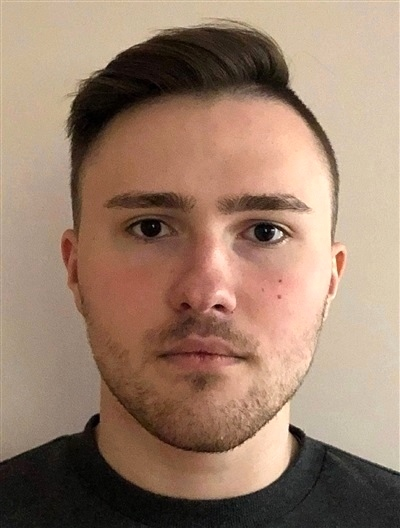

In [3]:
img = cv2.imread('face.png')
cv2_imshow(img)

# Näomarkerite koordinaatide leidmine

##

In [ ]:
#Leitavad näomarkerid
#Lõug, kulmud, ninasild, nina ots, silmad, huuled
face_landmarks = face_recognition.face_landmarks(img)
print(face_landmarks)

[{'chin': [(74, 231), (77, 267), (83, 304), (89, 340), (102, 372), (121, 400), (144, 423), (171, 439), (202, 444), (233, 440), (259, 425), (285, 403), (305, 376), (317, 343), (324, 308), (330, 273), (334, 237)], 'left_eyebrow': [(99, 212), (116, 194), (141, 189), (167, 191), (193, 199)], 'right_eyebrow': [(222, 199), (248, 193), (273, 192), (297, 198), (313, 215)], 'nose_bridge': [(208, 223), (207, 245), (206, 268), (205, 290)], 'nose_tip': [(182, 310), (193, 312), (204, 314), (215, 313), (227, 311)], 'left_eye': [(128, 230), (142, 221), (159, 220), (173, 233), (158, 237), (141, 237)], 'right_eye': [(241, 235), (256, 224), (274, 225), (287, 235), (274, 243), (256, 241)], 'top_lip': [(160, 356), (175, 346), (191, 340), (204, 344), (217, 341), (231, 348), (244, 359), (236, 358), (217, 354), (204, 355), (191, 354), (168, 356)], 'bottom_lip': [(244, 359), (230, 367), (216, 370), (203, 372), (189, 370), (174, 365), (160, 356), (168, 356), (190, 353), (203, 355), (216, 354), (236, 358)]}]


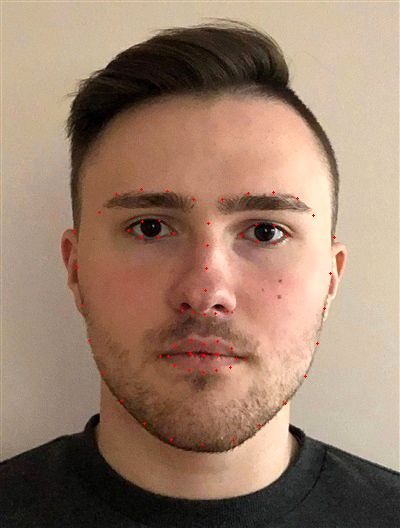

In [4]:
#Iga ennik tähendab ühte punkti pildi peal ning igale markerile vastav ennikute järjend "piirab" nende punktidega antud markeri ära -
result = face_recognition.face_landmarks(img)[0]
for k, v in result.items():
    for (x, y) in v:
        cv2.circle(img, (x, y), 1, (0, 0, 255), -1)
cv2_imshow(img)


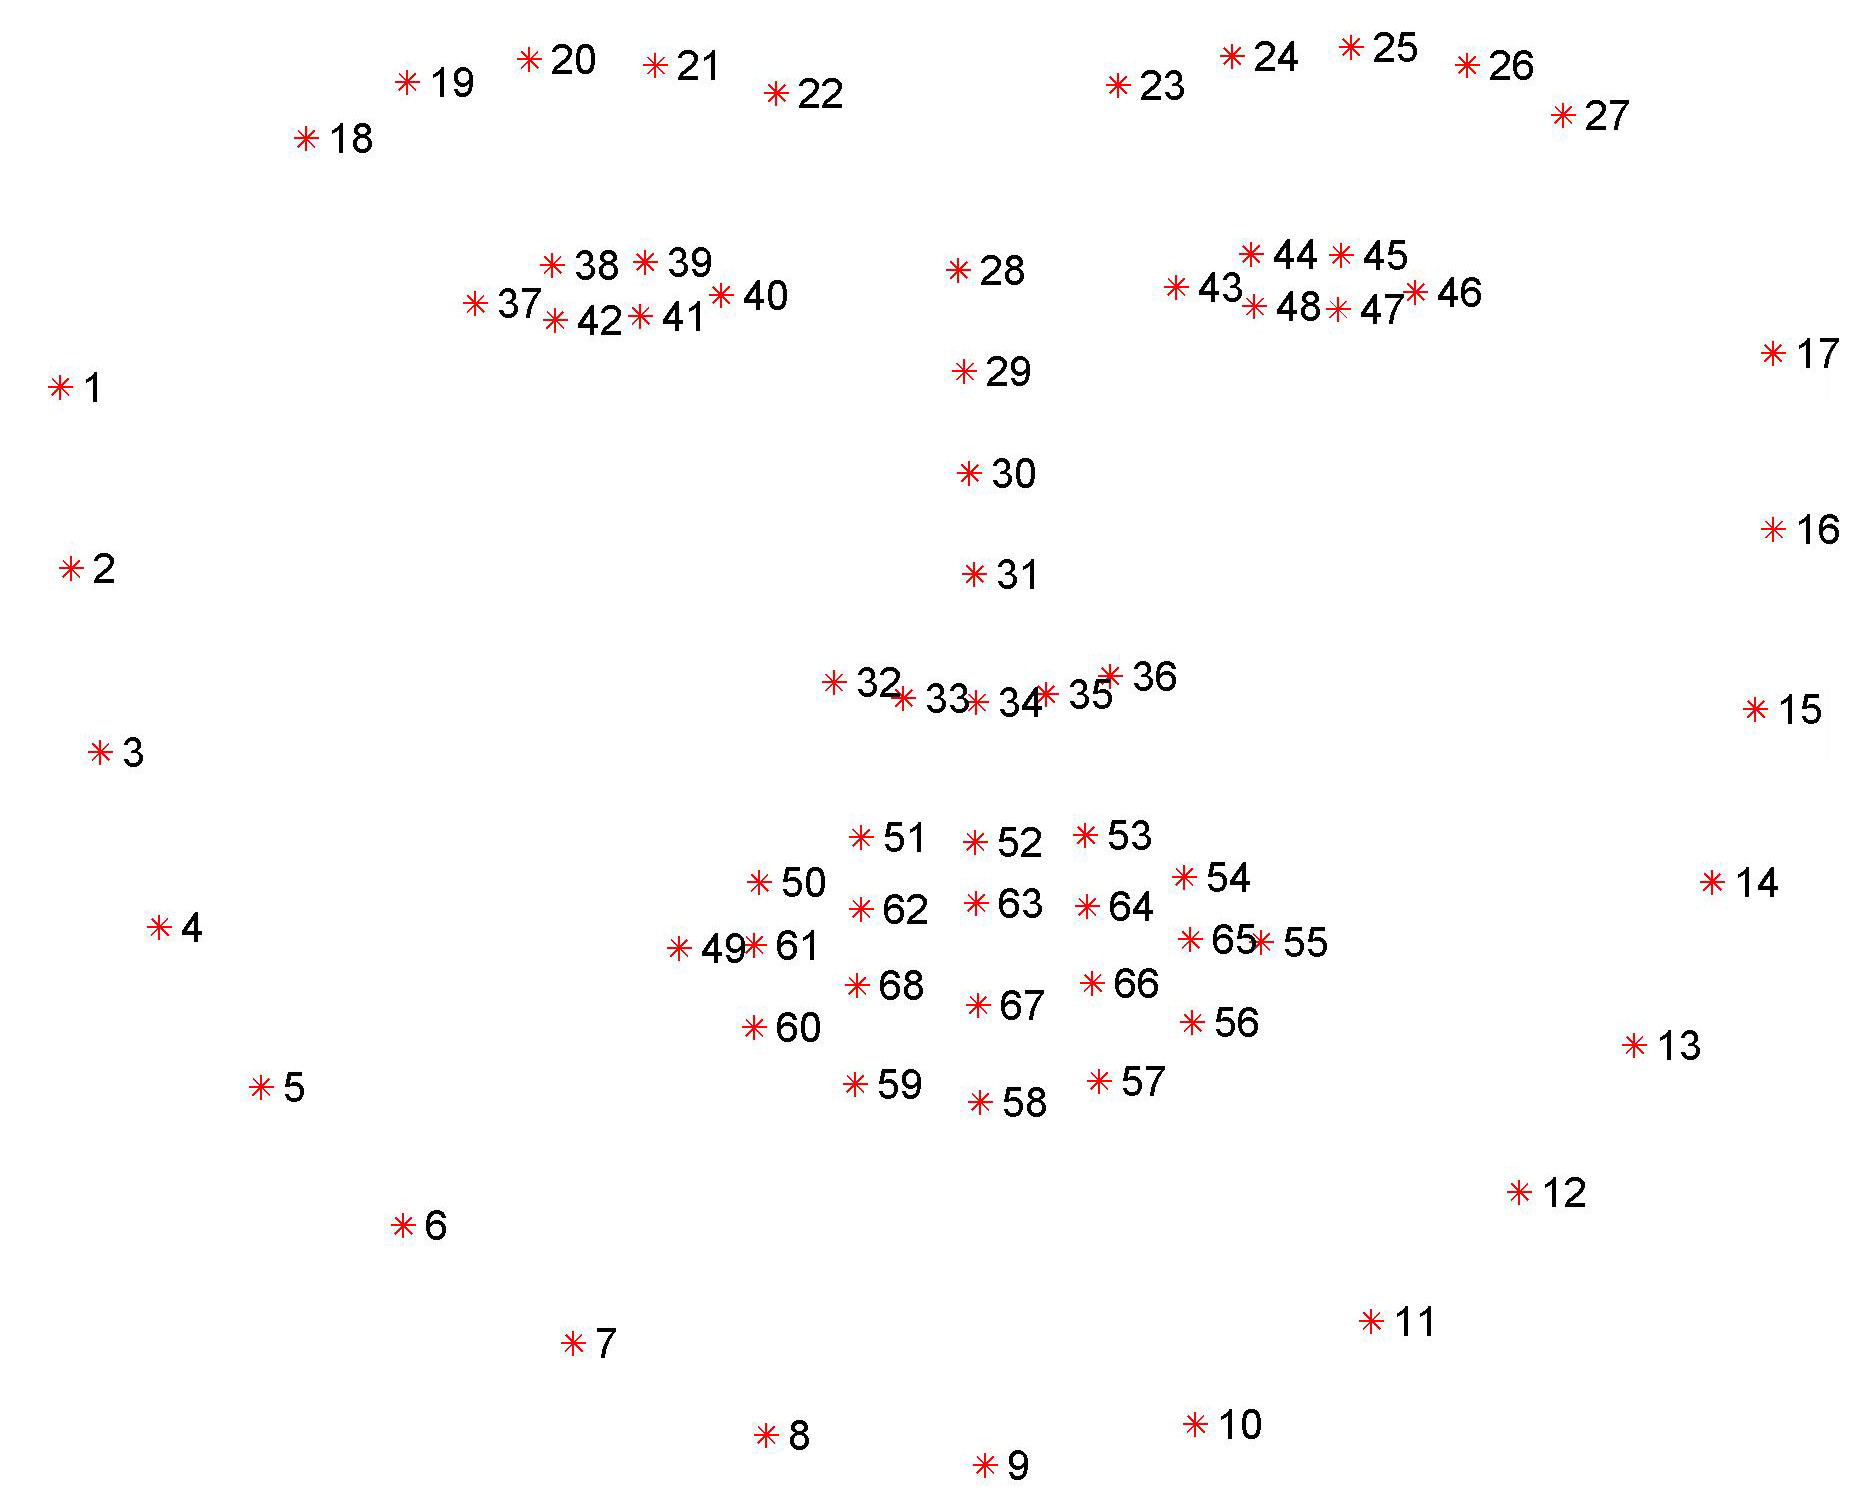

https://stackoverflow.com/questions/41794191/dlib-facial-landmark-starting-index

# Ülemiselt pildilt on näha, et kirjeldatavaid faktoreid saab palju välja mõelda. Näiteks saab pilti lõigata silmakoordinaatide põhjal ning RGB väärtuste võrdlemisega silmavärvi ära määrata, aga saab ka nina keskelt jooksva joone ja ninatipu äärmiste koordinaatide põhjal hinnata nina kõverust, laiust.
# Esialgne plaan oleks kirjeldamist piirata järgnevate faktoritega (https://promova.com/blog/how-to-describe-a-person-in-english-phrases-for-appearance):


*   Silmavärv (sinine, pruun...)
*   Silma kuju (ümmargused, üksteisest kaugel või lähedal...)
*   Kulmu kuju (sirged, kaares...)
*   Nina kuju (sirge, kõver; lai, kitsas...)
*   Lõua kuju (kitsas, lai...)
*   Näo kuju (ümmargune, ovaalne...)
*   Nahavärv
*   Habeme olemasolu



In [5]:
#Abifunktsioon markerite välja lõikamiseks
coordinates = []
for k, v in result.items():
    for (x, y) in v:
        coordinates.append((x, y))

def crop(coordinates):
      xCoordinates = [pair[0] for pair in coordinates]
      yCoordinates = [pair[1] for pair in coordinates]
      lowestX = min(xCoordinates)
      lowestY = min(yCoordinates)
      highestX = max(xCoordinates)
      highestY = max(yCoordinates)
      return ((lowestX, highestX), (lowestY, highestY))

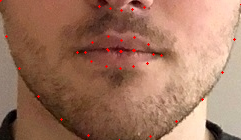

In [ ]:
#Lõug
((lowestX, highestX), (lowestY, highestY)) = crop(coordinates[2:14+1])
chin = img[
  lowestY:highestY,
  lowestX:highestX
]
cv2_imshow(chin)

In [ ]:
#Vasak kulm
((lowestX, highestX), (lowestY, highestY)) = crop(coordinates[22:26+1])
left_eyebrow = img[
  lowestY:highestY,
  lowestX:highestX
]
cv2_imshow(left_eyebrow)

In [ ]:
#Parem kulm
((lowestX, highestX), (lowestY, highestY)) = crop(coordinates[17:21+1])
print(((lowestX, highestX), (lowestY, highestY)))
right_eyebrow = img[
  lowestY:highestY,
  lowestX:highestX
]
cv2_imshow(right_eyebrow)

((99, 193), (189, 212))


In [ ]:
#Vasak silm
((lowestX, highestX), (lowestY, highestY)) = crop(coordinates[42:47+1])
left_eye = img[
  lowestY:highestY,
  lowestX:highestX
]
cv2_imshow(left_eye)

In [ ]:
#Vasak silm kitsendatult
((lowestX, highestX), (lowestY, highestY)) = (coordinates[43][0], coordinates[45+1][0]), (coordinates[43][1], coordinates[45+1][1])
left_eye_cropped = img[
  lowestY:highestY,
  lowestX:highestX
]
cv2_imshow(left_eye_cropped)

In [ ]:
#Parem silm
((lowestX, highestX), (lowestY, highestY)) = crop(coordinates[36:41+1])
right_eye = img[
  lowestY:highestY,
  lowestX:highestX
]
cv2_imshow(right_eye)

In [ ]:
#Parem silm kitsendatult
((lowestX, highestX), (lowestY, highestY)) = (coordinates[37][0], coordinates[39+1][0]), (coordinates[37][1], coordinates[39+1][1])
right_eye_cropped = img[
  lowestY:highestY,
  lowestX:highestX
]
cv2_imshow(right_eye_cropped)

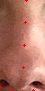

In [ ]:
#Nina
((lowestX, highestX), (lowestY, highestY)) = crop(coordinates[27:35+1])
nose = img[
  lowestY:highestY,
  lowestX:highestX
]
cv2_imshow(nose)

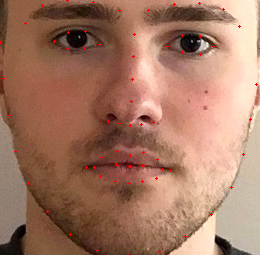

In [ ]:
#Kogu nägu
((lowestX, highestX), (lowestY, highestY)) = crop(coordinates[0:67+1])
face = img[
  lowestY:highestY,
  lowestX:highestX
]
cv2_imshow(face)

In [ ]:
img = cv2.imread('face.png')

# Nahavärvi leidmine

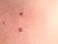

In [ ]:
#Kasutame vasaku põse ala
cheekArea = img[
  coordinates[1][1]:coordinates[35][1],
  coordinates[10][0]:coordinates[13][0]
]

cv2_imshow(cheekArea)

In [ ]:
#CV2 kasutab BGR formaati, muudame RGB-ks
cheekArea = cv2.cvtColor(cheekArea, cv2.COLOR_BGR2RGB)

#Kogume iga piksli RGB väärtused listi ja leiame keskmise
colours = []
for i in range(len(cheekArea)):
  for j in range(len(cheekArea[i])):
    colours.append(cheekArea[i][j])

rTotal = 0
gTotal = 0
bTotal = 0
for (r, g, b) in colours:
  rTotal+=r
  gTotal+=g
  bTotal+=b

r = rTotal/len(colours)
g = gTotal/len(colours)
b = bTotal/len(colours)

print(r, g, b)

237.5564263322884 178.99686520376176 160.78565830721004


Tulemusi võrdleme nahavärvide esindajatega

In [ ]:
def skinColourCompareRGB(colour):
        #The shortest Euclidean distance in 3 dimensions is considered the correct colour

        #The following are the hardcoded values that are considered as representatives of each skin colour
        #These are found by getting the average RGB values of examples of each skin colour
        #Pale white: [245, 186, 164]
        #Fair: [148, 115, 106]
        #Darker white: [146, 101, 78]
        #Light brown: [159, 122, 110]
        #Brown: [160, 112, 109]
        #Dark brown or black: [50, 37, 32]

        #Compare the found RGB values to the representative values and return the smallest found value
        differenceFromPaleWhite = math.sqrt(
            math.pow(colour[0] - 245, 2) +
            math.pow(colour[1] - 186, 2) +
            math.pow(colour[2] - 164, 2)
        )
        differenceFromFair = math.sqrt(
            math.pow(colour[0] - 148, 2) +
            math.pow(colour[1] - 115, 2) +
            math.pow(colour[2] - 106, 2)
        )
        differenceFromDarkerWhite = math.sqrt(
            math.pow(colour[0] - 146, 2) +
            math.pow(colour[1] - 101, 2) +
            math.pow(colour[2] - 78, 2)
        )
        differenceFromLightBrown = math.sqrt(
            math.pow(colour[0] - 159, 2) +
            math.pow(colour[1] - 122, 2) +
            math.pow(colour[2] - 110, 2)
        )
        differenceFromBrown = math.sqrt(
            math.pow(colour[0] - 160, 2) +
            math.pow(colour[1] - 112, 2) +
            math.pow(colour[2] - 109, 2)
        )
        differenceFromDarkBrownOrBlack = math.sqrt(
            math.pow(colour[0] - 50, 2) +
            math.pow(colour[1] - 37, 2) +
            math.pow(colour[2] - 32, 2)
        )


        #Return the smallest found value, meaning the shortest Euclidean distance
        diffAndColour = {
            differenceFromPaleWhite: "pale white",
            differenceFromFair: "fair",
            differenceFromDarkerWhite: "darker white",
            differenceFromLightBrown: "light brown",
            differenceFromBrown: "brown",
            differenceFromDarkBrownOrBlack: "dark brown or black"
        }
        result = ""
        diff = 9999999
        for key in diffAndColour:
            if(key<diff):
                diff = key
                result = diffAndColour[key]
        return result

In [ ]:
print(skinColourCompareRGB( (r, g, b) ))

pale white


# Silmavärvi kirjeldaja

In [ ]:
left_eye = img[
  coordinates[43][1]:coordinates[46][1],
  coordinates[43][0]:coordinates[46][0]
]
cv2_imshow(left_eye)

right_eye = img[
  coordinates[37][1]:coordinates[40][1],
  coordinates[37][0]:coordinates[40][0]
]
cv2_imshow(right_eye)

In [ ]:
left_eye = cv2.cvtColor(left_eye, cv2.COLOR_BGR2RGB)
right_eye = cv2.cvtColor(right_eye, cv2.COLOR_BGR2RGB)

In [ ]:
#Leiame kummagi silma keskmised r, g, b väärtused
def findEyeColour(eye):
        colours = []
        #Gather all the found RGB
        for i in range(len(eye)):
            for j in range(len(eye[i])):
                colours.append(eye[i][j])

        #Find the average
        rTotal = 0
        gTotal = 0
        bTotal = 0
        for (r, g, b) in colours:
            rTotal+=r
            gTotal+=g
            bTotal+=b

        r = round(rTotal/len(colours))
        g = round(gTotal/len(colours))
        b = round(bTotal/len(colours))
        return (r, g, b)

In [ ]:
print(findEyeColour(left_eye))
print(findEyeColour(right_eye))

(43, 33, 31)
(23, 13, 11)


Tulemusi võrdleme silmavärvi esindajatega

In [ ]:
def eyeColourCompareRGB(colour):
        #The shortest Euclidean distance in 3 dimensions is considered the correct colour

        #The following are the hardcoded values that are considered as representatives of each eye colour
        #These are found by getting the average RGB values of examples of each eye colour
        #Blue: [89, 117, 130]
        #Brown: [62, 48, 40]
        #Green: [70, 70, 42]
        #Grey: [113, 109, 114]
        #Hazel: [118, 99, 63]
        #Red: [158, 114, 120]


        #Compare the found RGB values to the representative values and return the smallest found value
        differenceFromBlue = math.sqrt(
            math.pow(colour[0] - 89, 2) +
            math.pow(colour[1] - 117, 2) +
            math.pow(colour[2] - 130, 2)
        )
        differenceFromBrown = math.sqrt(
            math.pow(colour[0] - 62, 2) +
            math.pow(colour[1] - 48, 2) +
            math.pow(colour[2] - 40, 2)
        )
        differenceFromGreen = math.sqrt(
            math.pow(colour[0] - 70, 2) +
            math.pow(colour[1] - 70, 2) +
            math.pow(colour[2] - 42, 2)
        )
        differenceFromGrey = math.sqrt(
            math.pow(colour[0] - 113, 2) +
            math.pow(colour[1] - 109, 2) +
            math.pow(colour[2] - 114, 2)
        )
        differenceFromHazel = math.sqrt(
            math.pow(colour[0] - 118, 2) +
            math.pow(colour[1] - 99, 2) +
            math.pow(colour[2] - 63, 2)
        )
        differenceFromRed = math.sqrt(
            math.pow(colour[0] - 158, 2) +
            math.pow(colour[1] - 114, 2) +
            math.pow(colour[2] - 120, 2)
        )


        #Return the smallest found value, meaning the shortest Euclidean distance
        diffAndColour = {
            differenceFromBlue: "blue",
            differenceFromBrown: "brown",
            differenceFromGreen: "green",
            differenceFromGrey: "grey",
            differenceFromHazel: "hazel",
            differenceFromRed: "red"
        }
        result = ""
        diff = 9999999
        for key in diffAndColour:
            if(key<diff):
                diff = key
                result = diffAndColour[key]
        return result

In [ ]:
#Tulemused
print(eyeColourCompareRGB(findEyeColour(left_eye)))
print(eyeColourCompareRGB(findEyeColour(right_eye)))

brown
brown


# Näokuju kirjeldaja

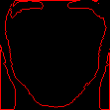

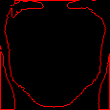

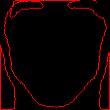

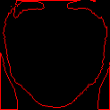

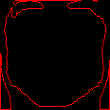

In [ ]:
#Loeme esindajate mallid sisse
os.chdir("faceshapes/templates")
diamond = cv2.imread('diamond.png')
oblong = cv2.imread('oblong.png')
oval = cv2.imread('oval.png')
round = cv2.imread('round.png')
square = cv2.imread('square.png')


cv2_imshow(diamond)
cv2_imshow(oblong)
cv2_imshow(oval)
cv2_imshow(round)
cv2_imshow(square)

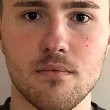

In [ ]:
#Eraldame näo ja muudame sisendpildi mallidega sama suureks
img_resized = img[
      coordinates[24][1]:coordinates[8][1],
      coordinates[0][0]:coordinates[16][0]
  ]
img_resized = cv2.resize(img_resized, (110, 110))
cv2_imshow(img_resized)

In [ ]:
#Sobitame malle näo peale, kõige lähedasem on näokuju ennustus
import numpy as np
templates = {"diamond": diamond, "oblong": oblong, "oval": oval, "round": round, "square": square}

matched_template = ""
matched_template_similarity = 0
for key, value in templates.items():
  res = cv2.matchTemplate(img,value,cv2.TM_CCOEFF_NORMED)
  similarity = np.max(res)
  if(similarity > matched_template_similarity):
    matched_template_similarity = similarity
    matched_template = key

print(matched_template)
print(matched_template_similarity)

oblong
0.15747352


# Näokarvade kirjeldaja

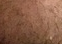

In [ ]:
#Lähenemine:
# 1. olemasolu ja tihedus - pikslite hulk, mis erineb tunduvalt nahavärvist, peab ületama seatud piiri. Osakaalu põhjal saab määrata tiheduse
# 2. värv - nende pikslite keskmine RGB väärtus


# 4 asukohta: lõug, nina ja ülemise huule vaheline osa, põsed
((lowestX, highestX), (lowestY, highestY)) = (coordinates[7][0], coordinates[8+1][0]), (coordinates[5][1], coordinates[7+1][1])
chin = img[
  lowestY:highestY,
  lowestX:highestX
]
cv2_imshow(chin)


((lowestX, highestX), (lowestY, highestY)) = (coordinates[7][0], coordinates[8+1][0]), (coordinates[33][1], coordinates[49+1][1])
upper_lip = img[
  lowestY:highestY,
  lowestX:highestX
]
cv2_imshow(upper_lip)


((lowestX, highestX), (lowestY, highestY)) = (coordinates[10][0], coordinates[11+1][0]), (coordinates[57][1], coordinates[11+1][1])
left_cheek = img[
  lowestY:highestY,
  lowestX:highestX
]
cv2_imshow(left_cheek)


((lowestX, highestX), (lowestY, highestY)) = (coordinates[5][0], coordinates[6+1][0]), (coordinates[57][1], coordinates[11+1][1])
right_cheek = img[
  lowestY:highestY,
  lowestX:highestX
]
cv2_imshow(right_cheek)

In [ ]:
#Kogume kokku kõik pikslid RGB formaadis
def getAllPixels(images):
  colours = []
  for x in range(len(images)):
    image = cv2.cvtColor(images[x], cv2.COLOR_BGR2RGB)
    for i in range(len(image)):
      for j in range(len(image[i])):
        colours.append(image[i][j])
  return colours


pixels = getAllPixels([chin, upper_lip, left_cheek, right_cheek])
print(pixels)

[array([129,  85,  58], dtype=uint8), array([123,  77,  51], dtype=uint8), array([118,  72,  46], dtype=uint8), array([119,  73,  49], dtype=uint8), array([125,  79,  53], dtype=uint8), array([125,  79,  53], dtype=uint8), array([131,  85,  59], dtype=uint8), array([139,  95,  68], dtype=uint8), array([129,  85,  58], dtype=uint8), array([133,  92,  64], dtype=uint8), array([134,  93,  65], dtype=uint8), array([132,  90,  65], dtype=uint8), array([131,  89,  64], dtype=uint8), array([129,  85,  60], dtype=uint8), array([135,  91,  66], dtype=uint8), array([140,  94,  70], dtype=uint8), array([135,  89,  65], dtype=uint8), array([140,  92,  69], dtype=uint8), array([145,  97,  74], dtype=uint8), array([142,  94,  71], dtype=uint8), array([148, 100,  77], dtype=uint8), array([145,  97,  75], dtype=uint8), array([147,  99,  79], dtype=uint8), array([139,  91,  69], dtype=uint8), array([136,  88,  66], dtype=uint8), array([138,  90,  68], dtype=uint8), array([152, 104,  82], dtype=uint8), 

In [ ]:
#Läbime kõik pikslid, näokarvadeks peame kõik pikslid, mis erinevad nahavärvist >25% võrra.
def getFacialHairPixels(pixels, skinColour):
  facialHairPixels = []
  for i in range(len(pixels)):
    isFacialHairPixel = pixelDiffersOverThreshold(pixels[i], skinColour, 0.25)
    if(isFacialHairPixel):
       facialHairPixels.append(pixels[i])

  return facialHairPixels


def pixelDiffersOverThreshold(colour1, colour2, threshold):
  rDiff = math.sqrt(math.pow(colour1[0]-colour2[0], 2)) / colour2[0]
  gDiff = math.sqrt(math.pow(colour1[1]-colour2[1], 2)) / colour2[1]
  bDiff = math.sqrt(math.pow(colour1[2]-colour2[2], 2)) / colour2[2]

  return (rDiff+gDiff+bDiff)/3 >= threshold

skinColour = (237.5564263322884, 178.99686520376176, 160.78565830721004) #Eelnevast plokist kopeeritud
facialHairPixels = getFacialHairPixels(pixels, skinColour)
print(facialHairPixels)

[array([129,  85,  58], dtype=uint8), array([123,  77,  51], dtype=uint8), array([118,  72,  46], dtype=uint8), array([119,  73,  49], dtype=uint8), array([125,  79,  53], dtype=uint8), array([125,  79,  53], dtype=uint8), array([131,  85,  59], dtype=uint8), array([139,  95,  68], dtype=uint8), array([129,  85,  58], dtype=uint8), array([133,  92,  64], dtype=uint8), array([134,  93,  65], dtype=uint8), array([132,  90,  65], dtype=uint8), array([131,  89,  64], dtype=uint8), array([129,  85,  60], dtype=uint8), array([135,  91,  66], dtype=uint8), array([140,  94,  70], dtype=uint8), array([135,  89,  65], dtype=uint8), array([140,  92,  69], dtype=uint8), array([145,  97,  74], dtype=uint8), array([142,  94,  71], dtype=uint8), array([148, 100,  77], dtype=uint8), array([145,  97,  75], dtype=uint8), array([147,  99,  79], dtype=uint8), array([139,  91,  69], dtype=uint8), array([136,  88,  66], dtype=uint8), array([138,  90,  68], dtype=uint8), array([152, 104,  82], dtype=uint8), 

In [ ]:
print(len(facialHairPixels)/len(pixels)) #Näokarva pikslite osakaal
#Olgu esialgsed lävendid:
#0-25% näokarvu pole
#25-50% õrn näokarva kate
#50+% paks näokarva kate

0.8091567023285084


In [ ]:
#Värv
def getAverageRGB(pixels):
    #Calculates the average RGB value from a list of pixels

    rTotal = 0
    gTotal = 0
    bTotal = 0

    for (r, g, b) in pixels:
        rTotal += r
        gTotal += g
        bTotal += b


    r = np.round(rTotal/len(pixels))
    g = np.round(gTotal/len(pixels))
    b = np.round(bTotal/len(pixels))
    return (r, g, b)












def compareRGB(colour):
    #The shortest Euclidean distance in 3 dimensions is considered the correct colour

    #The following are the hardcoded values that are considered as representatives of each facial hair colour
    #These are found by getting the average RGB values of examples of each facial hair colour
    #Red: (147.0, 87.0, 66.0)
    #Blonde: (129.0, 109.0, 90.0)
    #Brown: (126.0, 70.0, 55.0)
    #Black: (24.0, 26.0, 27.0)
    #Grey: (137.0, 137.0, 142.0)



    #Compare the found RGB values to the representative values and return the smallest found value
    differenceFromRed = math.sqrt(
        math.pow(colour[0] - 147, 2) +
        math.pow(colour[1] - 87, 2) +
        math.pow(colour[2] - 66, 2)
    )



    differenceFromBlonde = math.sqrt(
        math.pow(colour[0] - 129, 2) +
        math.pow(colour[1] - 109, 2) +
        math.pow(colour[2] - 90, 2)
    )



    differenceFromBrown = math.sqrt(
        math.pow(colour[0] - 126, 2) +
        math.pow(colour[1] - 70, 2) +
        math.pow(colour[2] - 55, 2)
    )



    differenceFromBlack = math.sqrt(
        math.pow(colour[0] - 24, 2) +
        math.pow(colour[1] - 26, 2) +
        math.pow(colour[2] - 27, 2)
    )



    differenceFromGrey = math.sqrt(
        math.pow(colour[0] - 137, 2) +
        math.pow(colour[1] - 137, 2) +
        math.pow(colour[2] - 142, 2)
    )




    #Return the smallest found value, meaning the shortest Euclidean distance
    diffAndColour = {
        differenceFromRed: "red",
        differenceFromBlonde: "blonde",
        differenceFromBrown: "brown",
        differenceFromBlack: "black",
        differenceFromGrey: "grey",
    }
    result = ""
    diff = 9999999
    for key in diffAndColour:
        if(key<diff):
            diff = key
            result = diffAndColour[key]
    return result

def describeFacialHairColour(facialHairPixels):
  #Compares the average RGB values within the "facial hair pixels" to representatives and classifies the image based on that

  #Get the average RGB value of the facial hair pixels
  (r, g, b) = getAverageRGB(facialHairPixels)


  #Compare it to representatives
  return compareRGB( (r, g, b) )

In [ ]:
print(describeFacialHairColour(facialHairPixels))

brown


# Nina kuju kirjeldaja


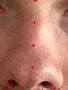

In [6]:
((lowestX, highestX), (lowestY, highestY)) = (coordinates[39][0], coordinates[41+1][0]), (coordinates[27][1], coordinates[33+1][1])

nose = img[
  lowestY:highestY,
  lowestX:highestX
]
cv2_imshow(nose)

In [9]:
#Mallidega võrdlemiseks tuleb värvid kaotada ja pilt mallidega sama suureks teha
nose = cv2.cvtColor(nose, cv2.COLOR_BGR2GRAY)
nose = cv2.resize(nose, (30, 25))
cv2_imshow(nose)

In [25]:
#Loeme esindajate mallid sisse
os.chdir("noseshapes/templates")
bulbous_nose = cv2.imread('bulbous_nose.png')
button_nose = cv2.imread('button_nose.png')
crooked_nose = cv2.imread('crooked_nose.png')
east_asian_nose = cv2.imread('east_asian_nose.png')
fleshy_nose = cv2.imread('fleshy_nose.png')
greek_nose = cv2.imread('greek_nose.png')
hawk_nose = cv2.imread('hawk_nose.png')
nubian_nose = cv2.imread('nubian_nose.png')
roman_nose = cv2.imread('roman_nose.png')
upturned_nose = cv2.imread('upturned_nose.png')

#Sisselugemise formaadi tõttu tuleb üks kord veel greyscaling läbi teha
bulbous_nose = cv2.cvtColor(bulbous_nose, cv2.COLOR_BGR2GRAY)
button_nose = cv2.cvtColor(button_nose, cv2.COLOR_BGR2GRAY)
crooked_nose = cv2.cvtColor(crooked_nose, cv2.COLOR_BGR2GRAY)
east_asian_nose = cv2.cvtColor(east_asian_nose, cv2.COLOR_BGR2GRAY)
fleshy_nose = cv2.cvtColor(fleshy_nose, cv2.COLOR_BGR2GRAY)
greek_nose = cv2.cvtColor(greek_nose, cv2.COLOR_BGR2GRAY)
hawk_nose = cv2.cvtColor(hawk_nose, cv2.COLOR_BGR2GRAY)
nubian_nose = cv2.cvtColor(nubian_nose, cv2.COLOR_BGR2GRAY)
roman_nose = cv2.cvtColor(roman_nose, cv2.COLOR_BGR2GRAY)
upturned_nose = cv2.cvtColor(upturned_nose, cv2.COLOR_BGR2GRAY)


cv2_imshow(bulbous_nose)
cv2_imshow(button_nose)
cv2_imshow(crooked_nose)
cv2_imshow(east_asian_nose)
cv2_imshow(fleshy_nose)
cv2_imshow(greek_nose)
cv2_imshow(hawk_nose)
cv2_imshow(nubian_nose)
cv2_imshow(roman_nose)
cv2_imshow(upturned_nose)

In [26]:
#Sobitame malle nina peale, kõige lähedasem on nina kuju ennustus
import numpy as np
noseTemplates = {
    "bulbous": bulbous_nose,
    "button": button_nose,
    "crooked": crooked_nose,
    "east_asian": east_asian_nose,
    "fleshy": fleshy_nose,
    "greek": greek_nose,
    "hawk": hawk_nose,
    "nubian": nubian_nose,
    "roman": roman_nose,
    "upturned": upturned_nose
    }

matched_template = ""
matched_template_similarity = 0
for key, value in noseTemplates.items():
  res = cv2.matchTemplate(nose,value,cv2.TM_CCOEFF_NORMED)
  similarity = np.max(res)
  if(similarity > matched_template_similarity):
    matched_template_similarity = similarity
    matched_template = key

print(matched_template)
print(matched_template_similarity)

roman
0.7240056
